In [52]:
# Dependencies
import numpy as np
import os
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# for the addional queries
from matplotlib import style
style.use('bmh')
import matplotlib.pyplot as plt
# Adding a Trendline and Equation for addional query's graphs
import seaborn as sns
from scipy import stats

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [29]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6).all()


[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [30]:
#  3. Convert the June temperatures to a list.
june_temp_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6).all()

In [31]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp_results, columns=['date','temperature'])
df.set_index(df['date'], inplace=True)

In [32]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


(0.0, 400.0)

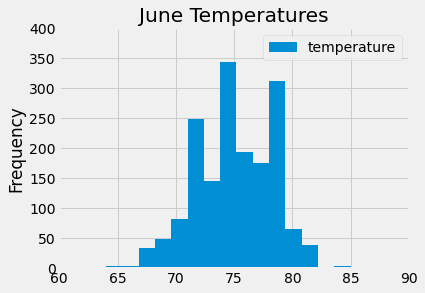

In [34]:
june_temp_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('June Temperatures')
plt.xlim([60,90])
plt.ylim([0,400])

## D2: Determine the Summary Statistics for December

In [35]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==12).all()

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [36]:
# 7. Convert the December temperatures to a list.
dec_temp_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==12).all()

In [37]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_temp_results, columns=['date','temperature'])
df.set_index(df['date'], inplace=True)

In [38]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


(0.0, 375.0)

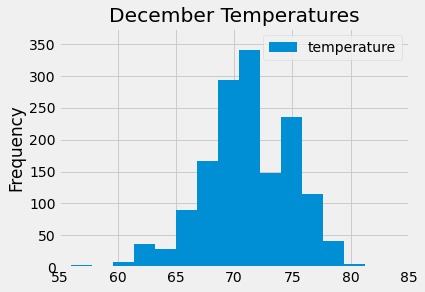

In [42]:
dec_temp_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('December Temperatures')
plt.xlim([55,85])
plt.ylim([0,375])

In [45]:
# Additional Query 1: June Precipitation
june_temp_prec = session.query(Measurement.tobs,Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
june_temp_prec_df = pd.DataFrame(june_temp_prec)
# print(june_temp_prec_df)
june_temp_prec_df.describe()

,0,1
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


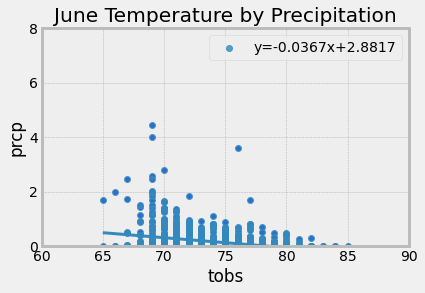

In [55]:
# June graph of temp x prcp with trendline
june_temp_prec_df = pd.DataFrame(june_temp_prec, columns=['tobs','prcp'])
# have to drop Nans to plot on the scatterplot
june_temp_prec_df = june_temp_prec_df.dropna()
june_temp_prec_df.plot.scatter('tobs', 'prcp')
plt.tight_layout()
plt.title('June Temperature by Precipitation')
plt.xlim([60, 90])
plt.ylim([0,8])

# Add Trendline and equation
slope, intercept, r_value, p_value, std_err = stats.linregress(june_temp_prec_df['tobs'],june_temp_prec_df['prcp'])
sns.regplot(x='tobs', y='prcp', data=june_temp_prec_df, ci=None, label="y={0:.4f}x+{1:.4f}".format(slope,intercept)).legend(loc="best")


In [54]:
# Additional Query 2: December Precipitation 
dec_temp_prec = session.query(Measurement.tobs,Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
dec_temp_prec_df = pd.DataFrame(dec_temp_prec)
# print(dec_temp_prcp_df)
dec_temp_prec_df.describe()

,0,1
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


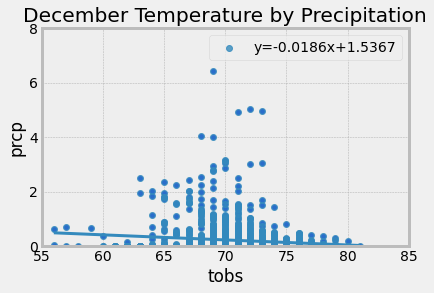

In [57]:
# Dec graph of temp x prcp with trendline
dec_temp_prec_df = pd.DataFrame(dec_temp_prec, columns=['tobs','prcp'])
# have to drop Nans to plot on the scatterplot
dec_temp_prec_df = dec_temp_prec_df.dropna()
dec_temp_prec_df.plot.scatter('tobs', 'prcp')
plt.tight_layout()
plt.title('December Temperature by Precipitation')
plt.xlim([55, 85])
plt.ylim([0,8])

# Add Trendline and equation
slope, intercept, r_value, p_value, std_err = stats.linregress(dec_temp_prec_df['tobs'], dec_temp_prec_df['prcp'])
sns.regplot(x='tobs', y='prcp', data=dec_temp_prec_df, ci=None, label="y={0:.4f}x+{1:.4f}".format(slope,intercept)).legend(loc="best")